# INSY695 - Group Project
### Data Cleaning - Tiancheng Zhang

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
bpd_df = pd.read_csv('../data/BPD_CRIME_DATA.csv')

In [30]:
bpd_df.shape

(276529, 15)

In [31]:
bpd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [32]:
bpd_df.head(10)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1
5,09/02/2017,22:00:00,5A,CHERRYCREST RD,BURGLARY,I,NaN,922.0,SOUTHERN,Cherry Hill,-76.62131,39.24867,"(39.2486700000, -76.6213100000)",ROW/TOWNHO,1
6,09/02/2017,21:15:00,1F,3400 HARMONY CT,HOMICIDE,Outside,FIREARM,232.0,SOUTHEASTERN,Canton,-76.56827,39.28202,"(39.2820200000, -76.5682700000)",Street,1
7,09/02/2017,21:35:00,3B,400 W LANVALE ST,ROBBERY - STREET,O,NaN,123.0,CENTRAL,Upton,-76.62789,39.30254,"(39.3025400000, -76.6278900000)",STREET,1
8,09/02/2017,21:00:00,4C,2300 LYNDHURST AVE,AGG. ASSAULT,O,OTHER,641.0,NORTHWESTERN,Windsor Hills,-76.68365,39.31370,"(39.3137000000, -76.6836500000)",STREET,1
9,09/02/2017,21:00:00,4E,1200 N ELLWOOD AVE,COMMON ASSAULT,I,HANDS,332.0,EASTERN,Berea,-76.57419,39.30551,"(39.3055100000, -76.5741900000)",ROW/TOWNHO,1


## Dataset overview and ideas on cleaning, pre-processing and feature engineer

**The dataset has 276,259 observations and 15 variables. Variables in <span style="color:red">red</span> indicate the existence of missing values.**

- Timestamp
 * CrimeDate: we first changed it to datetime, and then created/extracted new variables such as season and month from CrimeDate.
 * CrimeTime: we can extract/transform HourofTheDay
- Categorical
 * CrimeCode: NEED A REFERENCE HERE
 * <span style="color:red">Inside/Outside</span>: need to regroup "I" and "O" to "Inside" and "Outside" respectively.
 * <span style="color:red">Weapon</span>: missing values account for $\frac{2}{3}$ of the dataset, since it's a categorical variable, it will be hard to impute. By taking a further look at Weapon vs Description, we assume the NULL values stand for "no weapon", so we assign NULL values to "None".
 * District: rough geographical segmentation.
 * Neighborhood: administritive/geographical segmentation, can link to education level and housing price, etc
 * <span style="color:red">Premise</span>: 123 different categories, top 5 most frequent are STREET,
ROW/TOWNHO, "PARKING LO", "APT/CONDO", "OTHER - IN", which account for more than 80% of the dataset.
 
- Numerical:
    * Post: geographical/administration segmentation (reference:http://moit.baltimorecity.gov/sites/default/files/police_districts_w_posts.pdf)
    * Longitude: useful for geographical analysis and visualization
    * Latitude: useful for geographical analysis and visualization
    * Location 1(DROPPED): provide same info as Longitude and Latitude, so we can probably drop this one.
    * Total Incidents: all one column, can be dropped.
    
 
- Unstructure:
 * <span style="color:red">Location</span>: suggest to drop.


### Null Values

In [33]:
null_count = bpd_df.isnull().sum()
null_prop = null_count / len(bpd_df)
pd.DataFrame({
    'Count': null_count,
    'Proportion': null_prop})

,Count,Proportion
CrimeDate,0,0.000000
CrimeTime,0,0.000000
CrimeCode,0,0.000000
Location,2207,0.007981
Description,0,0.000000
Inside/Outside,10279,0.037172
Weapon,180952,0.654369
Post,224,0.000810
District,80,0.000289
Neighborhood,2740,0.009909


### CrimeDate

In [34]:
bpd_df.CrimeDate = pd.to_datetime(bpd_df.CrimeDate)

In [35]:
date = bpd_df.CrimeDate.dt.month*100 + bpd_df.CrimeDate.dt.day
bpd_df['Season'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['winter','spring','summer','autumn','winter '])
                  .str.strip()
               )

In [36]:
bpd_df['Season']

0         summer
1         summer
2         summer
3         summer
4         summer
           ...  
276524    winter
276525    winter
276526    winter
276527    winter
276528    winter
Name: Season, Length: 276529, dtype: object

In [37]:
bpd_df['Month'] = bpd_df.CrimeDate.dt.month

### CrimeTime

In [38]:
bpd_df['CrimeTime'] = [time if time != "24:00:00" else "0:00:00" for time in bpd_df['CrimeTime']]

In [39]:
bpd_df.CrimeTime = pd.to_datetime(bpd_df['CrimeTime'],format= '%H:%M:%S').dt.time

In [40]:
bpd_df.CrimeTime

0         23:30:00
1         23:00:00
2         22:53:00
3         22:50:00
4         22:31:00
            ...   
276524    00:00:00
276525    00:00:00
276526    00:00:00
276527    00:00:00
276528    00:00:00
Name: CrimeTime, Length: 276529, dtype: object

In [41]:
bpd_df['Hour'] = [int(str(time)[:2]) for time in bpd_df.CrimeTime]

### Inside/Outside

In [42]:
bpd_df['Inside/Outside'].unique()

array(['I', 'O', 'Outside', nan, 'Inside'], dtype=object)

In [43]:
bpd_df['Inside/Outside'].value_counts()
bpd_df['Inside/Outside'] = bpd_df['Inside/Outside'].replace('I', 'Inside')
bpd_df['Inside/Outside'] = bpd_df['Inside/Outside'].replace('O', 'Outside')

### Total Incidents

In [44]:
bpd_df['Total Incidents'].describe()

count    276529.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Total Incidents, dtype: float64

### Premise

In [45]:
bpd_df['Premise'].value_counts()

STREET        100919
ROW/TOWNHO     60502
PARKING LO     12043
APT/CONDO      12002
OTHER - IN     11459
               ...  
MOBILE HOM         2
Church             1
Gas Statio         1
MANUFACTUR         1
Day Care F         1
Name: Premise, Length: 123, dtype: int64

In [46]:
bpd_df['Premise'].unique()

array(['ROW/TOWNHO', 'STREET', 'Street', 'RETAIL/SMA', nan, 'YARD',
       'OTHER - IN', 'CONVENIENC', 'OFFICE BUI', 'APT/CONDO',
       'PARKING LO', 'LAUNDRY/CL', 'CARRY OUT', 'HOSP/NURS.',
       'RESTAURANT', 'BAR', 'GARAGE ON', 'ALLEY', 'DRIVEWAY',
       'PORCH/DECK', 'SHED/GARAG', 'TRACTOR TR', 'GAS STATIO',
       'PLAYGROUND', 'BUS/AUTO', 'DRUG STORE', 'PARK', 'GROCERY/CO',
       'CAR LOT-NE', 'SHOPPING M', 'LIQUOR STO', 'CHAIN FOOD',
       'OTHER - OU', 'POLICE DEP', 'CLOTHING/S', 'YARD/BUSIN',
       'SPECIALTY', 'POOL/BOWLI', 'INNER HARB', 'VACANT BUI', 'SCHOOL',
       'OTHER/RESI', 'HOTEL/MOTE', 'DEPARTMENT', 'WAREHOUSE',
       'BUS.  STOR', 'RELIGIOUS', 'Dwelling', 'TAVERN/NIG', 'APARTMENT',
       'BARBER/BEA', 'SINGLE HOU', 'PUBLIC BUI', 'MINI STORA',
       'FAST FOOD', 'DOCTORS OF', 'STADIUM', 'HOUSE UNDE', 'UNKNOWN',
       'Alley', 'BUS/RAILRO', 'LIBRARY', 'CAR  REPAI', 'AUTO PARTS',
       'CONSTRUCTI', 'Parking Lo', 'WHOLESALE/', 'Gas Statio', 'Vehicle',
     

We notice we can group variables such as "STREET" and "Street" together.

In [47]:
bpd_df['Premise'] = bpd_df['Premise'].replace('Street', 'STREET')
bpd_df['Premise'] = bpd_df['Premise'].replace('GARAGE ON', 'SHED/GARAGE')
bpd_df['Premise'] = bpd_df['Premise'].replace('SHED/GARAG', 'SHED/GARAGE')   
bpd_df['Premise'] = bpd_df['Premise'].replace('Garage', 'SHED/GARAGE')   
                           


### Weapon vs Description

In [48]:
bpd_df.Weapon.value_counts()

HANDS      48995
FIREARM    22312
OTHER      14620
KNIFE       9650
Name: Weapon, dtype: int64

In [49]:
bpd_df.Description.unique()

array(['ROBBERY - RESIDENCE', 'AUTO THEFT', 'SHOOTING', 'AGG. ASSAULT',
       'COMMON ASSAULT', 'BURGLARY', 'HOMICIDE', 'ROBBERY - STREET',
       'ROBBERY - COMMERCIAL', 'LARCENY', 'LARCENY FROM AUTO', 'ARSON',
       'ROBBERY - CARJACKING', 'ASSAULT BY THREAT', 'RAPE'], dtype=object)

/Users/tuliprichard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


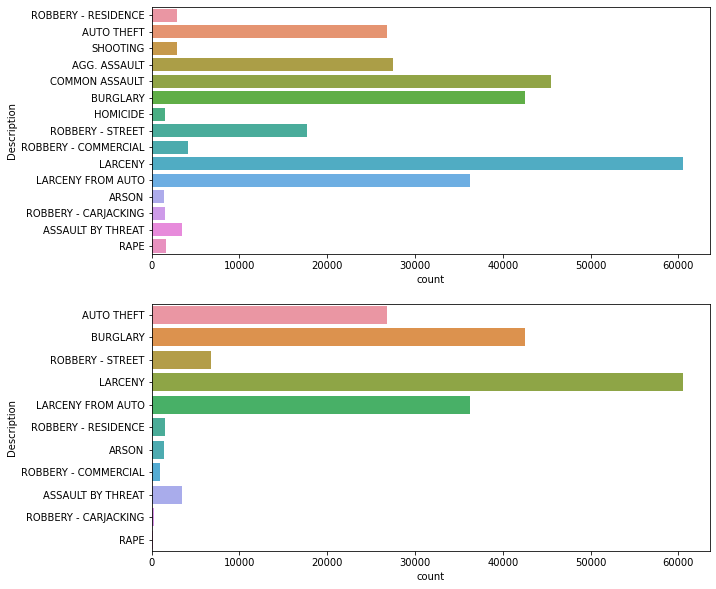

In [50]:
weapon_null = bpd_df[bpd_df['Weapon'].isnull()]

fig, ax = plt.subplots(2,1)
sns.countplot(y = bpd_df['Description'], ax = ax[0])
sns.countplot(y = weapon_null['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

By taking a further look at Weapon vs Description, we assume the NULL values stand for "no weapon", so we assign NULL values to "None".

In [51]:
bpd_df['Weapon'] = bpd_df['Weapon'].fillna('NONE')

In [52]:
bpd_df.to_csv('../data/BPD_CRIME_DATA_CLEAN.csv', index=False)
bpd_df_clean = pd.read_csv('../data/BPD_CRIME_DATA_CLEAN.csv')

In [53]:
bpd_df_clean.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,Season,Month,Hour
0,2017-09-02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,Inside,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,summer,9,23
1,2017-09-02,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,Outside,NONE,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,summer,9,23
2,2017-09-02,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",STREET,1,summer,9,22
3,2017-09-02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,Inside,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,summer,9,22
4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,Outside,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,summer,9,22
